In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Classroom/bodyfat.csv")
x=df.iloc[:,[2,14]].values
y=df.iloc[:,1].values

In [ ]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [ ]:
x

array([[23. , 17.1],
       [22. , 18.2],
       [22. , 16.6],
       [26. , 18.2],
       [24. , 17.7],
       [24. , 18.8],
       [26. , 17.7],
       [25. , 18.8],
       [25. , 18.2],
       [23. , 19.2],
       [26. , 18.5],
       [27. , 19. ],
       [32. , 17.7],
       [30. , 18.8],
       [35. , 18.2],
       [35. , 16.9],
       [34. , 17.3],
       [32. , 19.3],
       [28. , 18.5],
       [33. , 18.2],
       [28. , 18.4],
       [28. , 19.9],
       [31. , 16.7],
       [32. , 17.1],
       [28. , 17.6],
       [27. , 17.7],
       [34. , 16.5],
       [31. , 17. ],
       [27. , 17.2],
       [29. , 17.6],
       [32. , 18.4],
       [29. , 17.9],
       [27. , 18.8],
       [41. , 18.7],
       [41. , 19.7],
       [49. , 17. ],
       [40. , 19. ],
       [50. , 19.4],
       [46. , 21.4],
       [50. , 18.3],
       [45. , 21.4],
       [44. , 17.4],
       [48. , 18.4],
       [41. , 18.8],
       [39. , 16.1],
       [43. , 18.3],
       [40. , 17.3],
       [39. ,

In [ ]:
y

array([12.3,  6.1, 25.3, 10.4, 28.7, 20.9, 19.2, 12.4,  4.1, 11.7,  7.1,
        7.8, 20.8, 21.2, 22.1, 20.9, 29. , 22.9, 16. , 16.5, 19.1, 15.2,
       15.6, 17.7, 14. ,  3.7,  7.9, 22.9,  3.7,  8.8, 11.9,  5.7, 11.8,
       21.3, 32.3, 40.1, 24.2, 28.4, 35.2, 32.6, 34.5, 32.9, 31.6, 32. ,
        7.7, 13.9, 10.8,  5.6, 13.6,  4. , 10.2,  6.6,  8. ,  6.3,  3.9,
       22.6, 20.4, 28. , 31.5, 24.6, 26.1, 29.8, 30.7, 25.8, 32.3, 30. ,
       21.5, 13.8,  6.3, 12.9, 24.3,  8.8,  8.5, 13.5, 11.8, 18.5,  8.8,
       22.2, 21.5, 18.8, 31.4, 26.8, 18.4, 27. , 27. , 26.6, 14.9, 23.1,
        8.3, 14.1, 20.5, 18.2,  8.5, 24.9,  9. , 17.4,  9.6, 11.3, 17.8,
       22.2, 21.2, 20.4, 20.1, 22.3, 25.4, 18. , 19.3, 18.3, 17.3, 21.4,
       19.7, 28. , 22.1, 21.3, 26.7, 16.7, 20.1, 13.9, 25.8, 18.1, 27.9,
       25.3, 14.7, 16. , 13.8, 17.5, 27.2, 17.4, 20.8, 14.9, 18.1, 22.7,
       23.6, 26.1, 24.4, 27.1, 21.8, 29.4, 22.4, 20.4, 24.9, 18.3, 23.3,
        9.4, 10.3, 14.2, 19.2, 29.6,  5.3, 25.2,  9

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


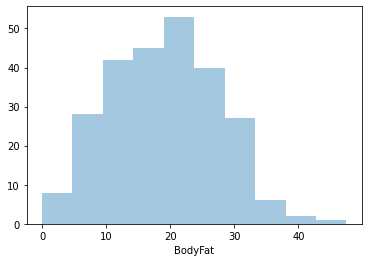

In [ ]:
sns.distplot(df["BodyFat"],kde=False,bins=10)

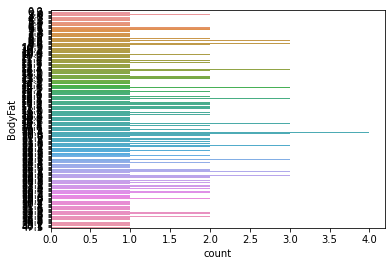

In [ ]:
sns.countplot(y="BodyFat",data=df)

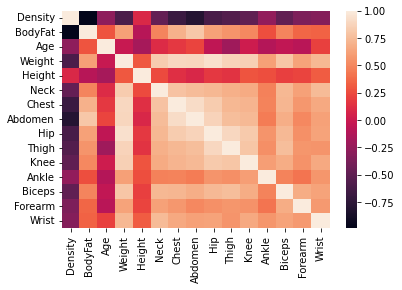

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([13.22294812, 26.29018965, 16.16885024, 16.70870022, 14.81011964,
       20.4213191 , 19.11475236, 21.55003468, 23.65097423, 17.52758085,
       16.34670141, 21.06392268, 16.04158882, 20.06246853, 15.24564188,
       17.70858025, 22.13732616, 14.12007455, 17.2177459 , 20.14071433,
       20.83075942, 19.14083429, 25.13696626, 16.80987971, 18.62864037,
       31.36153914, 15.6550822 , 22.6510942 , 16.65653635, 23.21387787,
       25.08637652, 16.14434243, 16.83596164, 15.78549186, 18.98591682,
       13.17078426, 23.13563207, 17.01223868, 12.89017948, 17.75759588,
       17.88643142, 15.63057439, 17.01538692, 17.73151394, 18.14252838,
       17.42482724, 22.90876528, 12.78899999, 21.90888525, 13.99281313,
       21.29393771, 20.93193891, 16.73163391, 21.14059436, 22.88268335,
       13.96673119, 23.26604173, 16.96164894, 24.44377293, 14.12007455,
       13.96515707, 18.529035  , 17.19166397, 21.06234857, 17.8619236 ,
       24.13866035, 19.80637157, 21.44570695, 18.49823071, 22.57

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 6.003423991432937
MSE: 54.55466519337018
RMSE: 2.450188562423908
